In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Теперь решаем задачу регрессии - предскажем цены на недвижимость.

Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии

Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)

В качестве решения: Jupyter notebook с кодом, комментариями и графикам

In [114]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [115]:
train_col_set = set(df_train.columns)
test_col_set = set(df_test.columns)
train_col_set - test_col_set

{'SalePrice'}

In [116]:
df_test['SalePrice'] = -1
df_train['is_train'] = 1
df_test['is_train'] = 0

In [117]:
# соединим обучающий и тесовый наборы для одновременной обработки признаков.
df = pd.concat([df_train, df_test])

In [118]:
df.set_index('Id', inplace=True)
cat_cols = df_train.columns[df_train.dtypes == object]
num_cols = df_train.columns[df_train.dtypes != object]

In [119]:
pd.options.display.max_rows = 90
df.head().T

Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

Для начала рассмотрим неполные признаки

In [121]:
# целевая переменная
trg = 'SalePrice'

In [122]:
# количество пропущенных значений для неполных признаков
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [123]:
# неполные признаки
not_full_colls = sorted(list(df.columns[df.isna().sum()>0]))
not_full_colls

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

In [124]:
# для следующих признаков заполним отсутствующие значения наиболее часто встречающимися
mode_cols = ['Electrical', 'Functional', 'MSZoning', 'SaleType', 'Utilities']

for col in mode_cols:
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [125]:
# в датасете имеется множество сопряженных признаков, например относящихся к гаражу, подвалу и др.
# рассмотрим признаки с отсутствующими значениями, не имеющими сопряженных признаков.
single_not_full_cols = ['Alley', 'Fence', 'MiscFeature']

In [127]:
# уникальные значения single_not_full_cols
for col in single_not_full_cols:
    print(df[col].value_counts(dropna=False))

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64
NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


In [128]:
# будем считать, что отсутствие значения означает отсутствие данного признака. 
# Заполним отсутсвтующие значения строками 'to_drop', для того, 
# чтобы после преобразования категориальных переменных в dummies, удалить столбцы, содержащие to_drop.
# т.к. значение 0 для каждого из сопряженных признаков уже будет говорить об отсутсвии этого признака.
for col in single_not_full_cols:
    df.loc[df[col].isna(), col] = 'to_drop'

In [129]:
# рассмотрим признаки относящиеся к бассейну и их влияние на цену (на обучающем наборе).
df.loc[df['PoolArea']>0, ['PoolArea', 'SalePrice', 'PoolQC']].sort_values('PoolArea')

,PoolArea,SalePrice,PoolQC
Id,,,
1975,144,-1,Ex
2574,228,-1,Ex
2421,368,-1,NaN
2504,444,-1,NaN
1299,480,160000,Gd
198,512,235000,Ex
1387,519,250000,Fa
1183,555,745000,Ex
2600,561,-1,NaN


В целом у площади бассейна и ценой недвижимости - прямая зависимость. Только один объект сильно выбивается из общей картины (цена значительно выше, чем у других объектов с бассейном). Признак PoolQC не выглядит полезным, т.к. совершенно не коррелирует с ценой. Поэтому удалим его.

In [130]:
df.drop('PoolQC', axis=1, inplace=True)
not_full_colls.remove('PoolQC')

In [131]:
# рассмотрим признаки относящиеся к гаражу.
garage_cols = [col for col in df.columns if 'Garage' in col]
df[garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2.0,548.0,TA,TA
2,Attchd,1976.0,RFn,2.0,460.0,TA,TA
3,Attchd,2001.0,RFn,2.0,608.0,TA,TA
4,Detchd,1998.0,Unf,3.0,642.0,TA,TA
5,Attchd,2000.0,RFn,3.0,836.0,TA,TA


In [132]:
df[garage_cols].isna().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

In [133]:
# У признака 'GarageType' на 2 пропущенных значения меньше, чем у остальных. Посмотрим на эти 2 образца.
df.loc[(df['GarageFinish'].isna()) & (df['GarageType'].notna()), garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df.loc[[2127, 2577], 'GarageFinish'] = 'Unf'
df.loc[[2127, 2577], 'GarageQual'] = df['GarageQual'].mode()[0]
df.loc[[2127, 2577], 'GarageCond'] = df['GarageCond'].mode()[0]
df.loc[2577, ['GarageCars', 'GarageArea']] = df.loc[2127, ['GarageCars', 'GarageArea']]

Заполним отсутствующие значения категориальных признаков 'to_drop'. <br>
Пропущенные GarageYrBlt заполним значениями из YerBuilt.

In [135]:
df.loc[df['GarageType'].isna(), ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = 'to_drop'
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearRemodAdd']

In [136]:
# рассмотрим признаки относящиеся к кирпичной кладке.
mas_cols = [col for col in df.columns if 'Mas' in col]
df[mas_cols].head()

,MasVnrType,MasVnrArea
Id,,
1,BrkFace,196.0
2,None,0.0
3,BrkFace,162.0
4,None,0.0
5,BrkFace,350.0


In [137]:
df[mas_cols].isna().sum()

MasVnrType    24
MasVnrArea    23
dtype: int64

In [138]:
df.loc[(df['MasVnrType'].isna()) & (df['MasVnrArea'].notna()), mas_cols]

,MasVnrType,MasVnrArea
Id,,
2611,NaN,198.0


In [139]:
df['MasVnrType'].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [140]:
df.loc[2611, 'MasVnrType'] = 'BrkFace'

Заполним отсутствующие значения признака MasVnrType значением 'to_drop', MasVnrArea нулями.

In [141]:
df.loc[df['MasVnrType'].isna(), 'MasVnrType'] = 'to_drop'
df['MasVnrType'].replace('None', 'to_drop')
df.loc[df['MasVnrArea'].isna(), 'MasVnrArea'] = 0

In [142]:
# рассмотрим признаки относящиеся к подвалу.
bsmt_cols = [col for col in df.columns if 'Bsmt' in col]
df[bsmt_cols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0


In [143]:
bsmt_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [144]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage      486
Exterior1st        1
Exterior2nd        1
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
FireplaceQu     1420
dtype: int64

In [145]:
df.loc[df['BsmtFullBath'].isna(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [146]:
for col in bsmt_cols:
    if col in cat_cols:
        df.loc[[2121, 2189], col] = 'to_drop'
    else:
        df.loc[[2121, 2189], col] = 0

In [147]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage      486
Exterior1st        1
Exterior2nd        1
BsmtQual          79
BsmtCond          80
BsmtExposure      80
BsmtFinType1      77
BsmtFinType2      78
KitchenQual        1
FireplaceQu     1420
dtype: int64

Два признака, относящихся к подвалу имеют на 1-3 образца со значением NaN больше, чем остальные. Рассмотрим эти образцы.

In [148]:
df.loc[(df['BsmtCond'].isna()) & (df['BsmtFinType1'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [149]:
bsmt_cat_cols = [col for col in bsmt_cols if df[col].dtype==object and col!='BsmtCond']
bsmt_cat_cols

['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [150]:
for idx in [2041, 2186, 2525]:
    # находим моду признака 'BsmtCond' среди всех образцов датасета, имеющих 
    # такие же значения признаков bsmt_cat_cols, как у образца с индексом idx.
    mode = df['BsmtCond'][((df[bsmt_cat_cols]==df.loc[[idx], bsmt_cat_cols].values).sum(
            axis=1)==4) & (df['BsmtCond'].notna())].mode()[0]
    df.loc[[idx], 'BsmtCond'] = mode

In [152]:
# проделываем тоже самое для признака BsmtQual
df.loc[(df['BsmtQual'].isna()) & (df['BsmtFinType1'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [153]:
bsmt_cat_cols = [col for col in bsmt_cols if df[col].dtype==object and col!='BsmtQual']
bsmt_cat_cols

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [154]:
for idx in [2218, 2219]:
    # находим моду признака 'BsmtQual' среди всех образцов датасета, имеющих 
    # такие же значения признаков bsmt_cat_cols, как у образца с индексом idx.
    mode = df['BsmtQual'][((df[bsmt_cat_cols]==df.loc[[idx], bsmt_cat_cols].values).sum(
            axis=1)==4) & (df['BsmtQual'].notna())].mode()[0]
    df.loc[[idx], 'BsmtQual'] = mode

In [155]:
df.loc[(df['BsmtExposure'].isna()) & (df['BsmtFinType1'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [156]:
df.loc[(df['BsmtExposure'].isna()) & (df['BsmtFinType1'].notna()), 'BsmtExposure'] = 'No'

In [157]:
df.loc[(df['BsmtFinType2'].isna()) & (df['BsmtFinType1'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [158]:
# Заполним отсутствующий признак значением 'Unf'
df.loc[(df['BsmtFinType2'].isna()) & (df['BsmtFinType1'].notna()), 'BsmtFinType2'] = 'Unf'

In [159]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage      486
Exterior1st        1
Exterior2nd        1
BsmtQual          77
BsmtCond          77
BsmtExposure      77
BsmtFinType1      77
BsmtFinType2      77
KitchenQual        1
FireplaceQu     1420
dtype: int64

In [160]:
# Заполним отсутствующие категориальные признаки значением 'to_drop'.
bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df.loc[df['BsmtQual'].isna(), bsmt_cat_cols] = 'to_drop'
not_full_colls = [col for col in not_full_colls if col not in bsmt_cols]

Рассмотрим признаки, относящиеся к камину.

In [161]:
fireplace_cols = [col for col in df.columns if 'Fireplace' in col]
df[fireplace_cols].head()

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
2,1,TA
3,1,TA
4,1,Gd
5,1,TA


In [162]:
df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'] = 'to_drop'

In [163]:
# рассмотрим пропущенные значения признаков, относящихся к экстерьеру.
exterior_cols = [col for col in df.columns if 'Exterior' in col]
df.loc[df['Exterior1st'].isna(), exterior_cols]

,Exterior1st,Exterior2nd
Id,,
2152,NaN,NaN


In [164]:
df.loc[df['Exterior1st'].isna(), exterior_cols] = ['Other', 'Other']

In [165]:
df.loc[df['KitchenQual'].isna(), 'KitchenQual']

Id
1556    NaN
Name: KitchenQual, dtype: object

In [166]:
df.loc[1556, 'KitchenQual'] = df['KitchenQual'].mode()[0]

In [167]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage    486
dtype: int64

Заполним пропущенные значения 'LotFrontage' методом K ближайших соседей.

In [172]:
temp_df = df.drop(['is_train', trg], axis=1).copy()
temp_df = pd.get_dummies(temp_df)

In [173]:
temp_train = temp_df[temp_df['LotFrontage'].notna()].drop('LotFrontage', axis=1)
temp_test = temp_df[temp_df['LotFrontage'].isna()].drop('LotFrontage', axis=1)

In [174]:
temp_y_train = temp_df[temp_df['LotFrontage'].notna()]['LotFrontage']

In [176]:
temp_train.shape, temp_test.shape, temp_y_train.shape

((2433, 299), (486, 299), (2433,))

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
scaler = StandardScaler()

In [ ]:
temp_train_sc = scaler.fit_transform(temp_train)
temp_test_sc = scaler.transform(temp_test)

In [180]:
from sklearn.neighbors import KNeighborsRegressor

In [181]:
clf = KNeighborsRegressor()

In [182]:
clf.fit(temp_train_sc, temp_y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [183]:
lot_frontage = clf.predict(temp_test_sc)
lot_frontage

array([ 85.4,  77.2,  76.8,  75.4,  77.8,  73.2,  67.8,  67.2,  98.6,
        67. ,  82.8,  59.4,  62.2,  91.2,  77.2,  66.4,  65.2,  88. ,
        74.8,  72.8,  47.6,  77.4,  82.6,  79.8,  62.6,  53. ,  79.6,
        79.2,  82.8,  88. ,  88.2,  52.8,  79.8,  26. ,  51. ,  69.2,
        42.2,  68.8,  83.8,  76.4,  73.6,  77.2,  72.4,  59.6,  73.2,
        84. ,  69.2,  65. ,  70.6,  81.2,  54.4,  66. ,  64.4,  92.8,
        62. ,  69.8,  82.2,  58. ,  83.4,  73.8,  74.2,  61.2,  53.4,
        59. ,  80.4,  80.2,  65.8,  67.6,  60. ,  83.8,  71.8,  62. ,
        64.4,  72. ,  80. ,  82.4,  73. ,  82.2,  79. , 132. ,  58.4,
        68.4,  45. ,  41.8,  76.4,  33.6,  82.2,  86. ,  61.2,  71.2,
        72.4,  80.4,  71. ,  88. ,  74. ,  45. ,  73.6,  95.2,  67.4,
        62.6,  42.2,  84. ,  81.6,  72.2,  67. ,  31.4,  70.4,  69.6,
        73.6,  75.8,  77. ,  78. ,  83.6,  69.2,  85. ,  39. ,  32.4,
        45. ,  70.4,  75.4,  54. ,  80.8,  42.2,  81.6,  74. ,  81.6,
        65.4,  64.6,

In [184]:
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = lot_frontage

In [185]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

Пропущенные значения заполнены

In [187]:
# категориальные и числовые признаки
cat_cols = df.columns[df.dtypes == object]
num_cols = df.columns[df.dtypes != object]

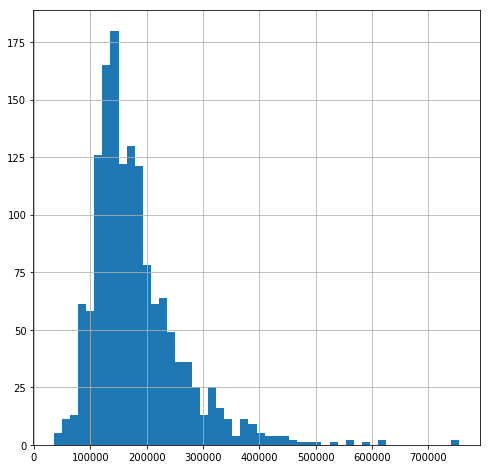

In [188]:
ax = df.loc[df['is_train']==1 ,'SalePrice'].hist(bins=50, figsize=(8,8))

Большая часть недвижимости продается в диапазоне цен 120000 - 200000. Распределение цен ассиметрично и имеет вытянутый вправо хвост.

In [189]:
df.loc[df['is_train']==1 ,'SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [190]:
from scipy.stats import skew

# рассчитаем ассиметричность целевой переменной
df.loc[df['is_train']==1 ,'SalePrice'].skew()

1.8828757597682129

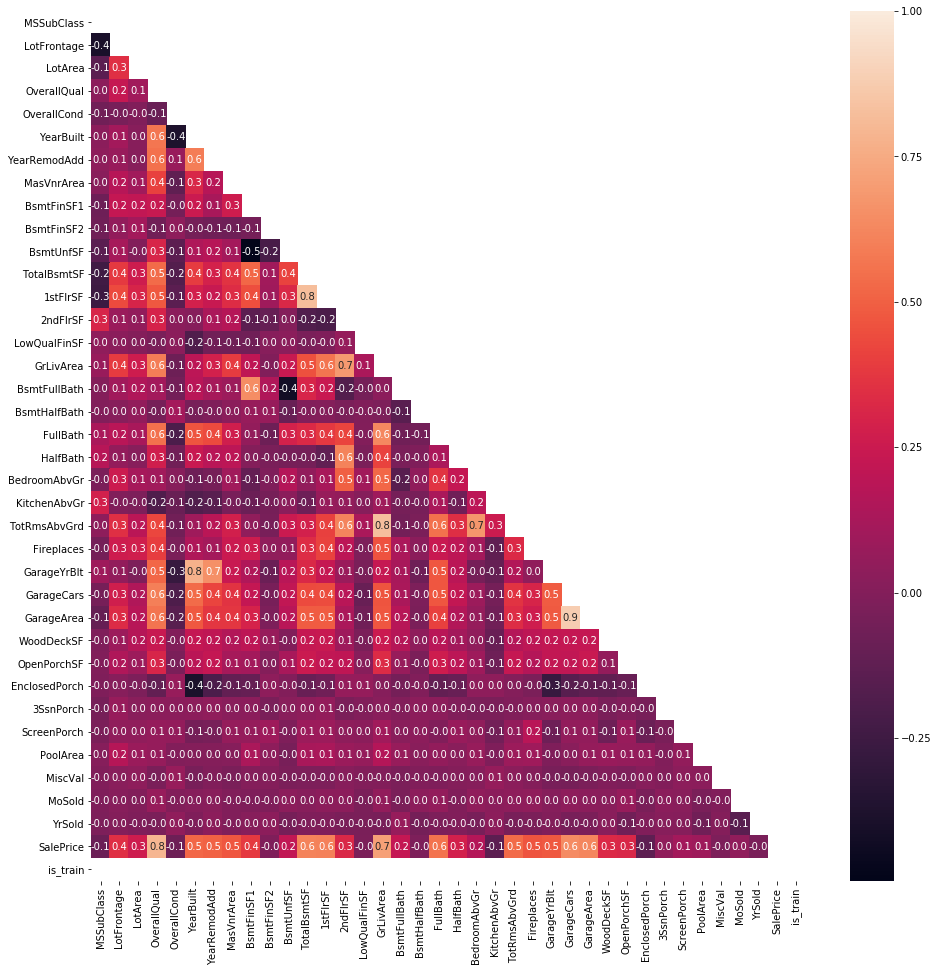

In [191]:
# Посмотрим на корреляцию числовых признаков
corr = df.loc[df['is_train']==1 ,num_cols].corr()

plt.figure(figsize = (16,16))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

ax = sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Цена продажи сильно коррелирует с качеством дома и GrLivArea

In [192]:
correlated_num_cols = corr.loc[np.abs(corr['SalePrice'])>0.5, 'SalePrice'].index

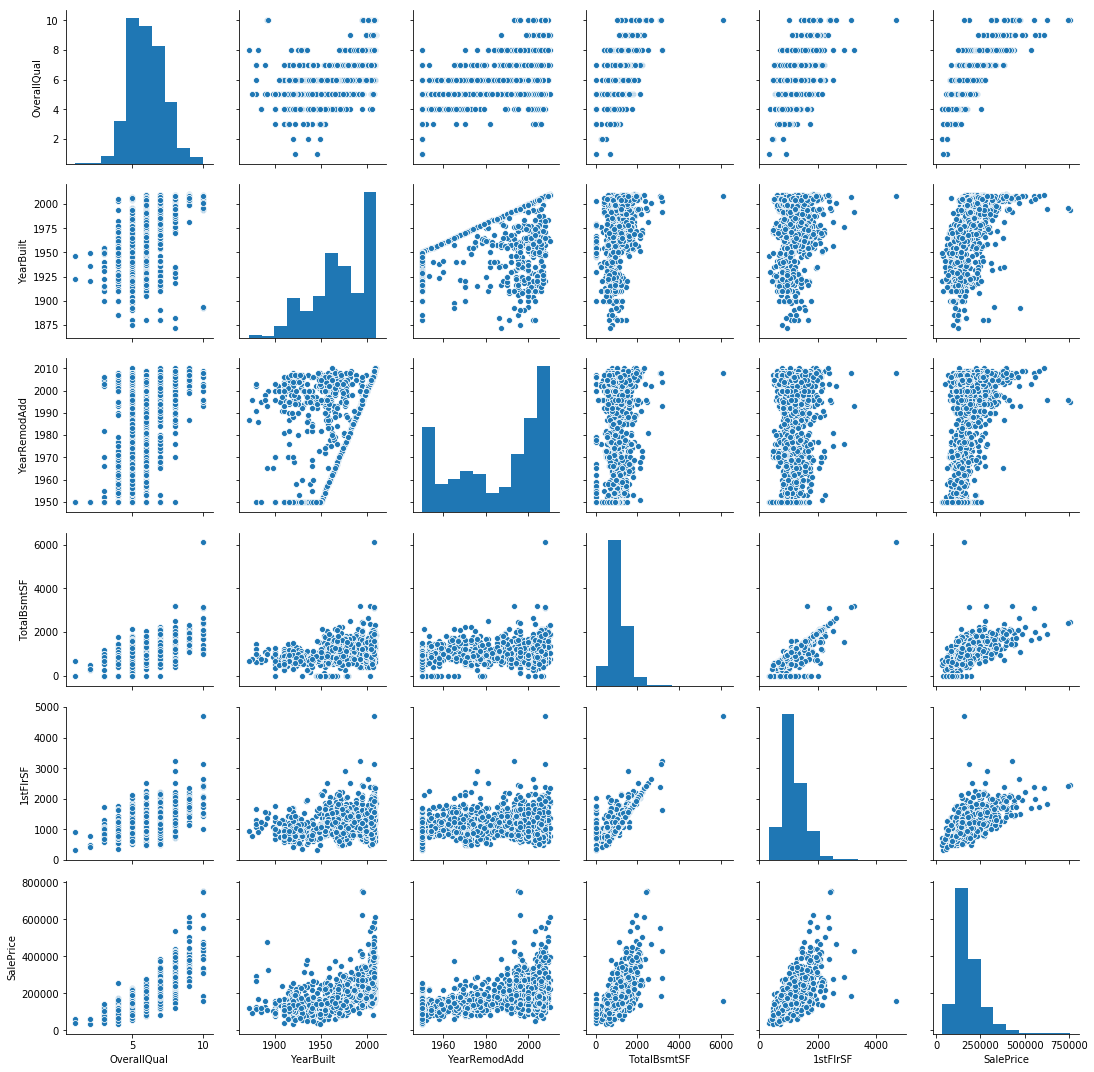

In [193]:
ax = sns.pairplot(data = df[df['is_train']==1], vars=list(correlated_num_cols[:5])+['SalePrice'])

Цена недвижимости имеет довольно сильную корреляцию с площадью, также заметна корреляция с годом постройки и реконструкции

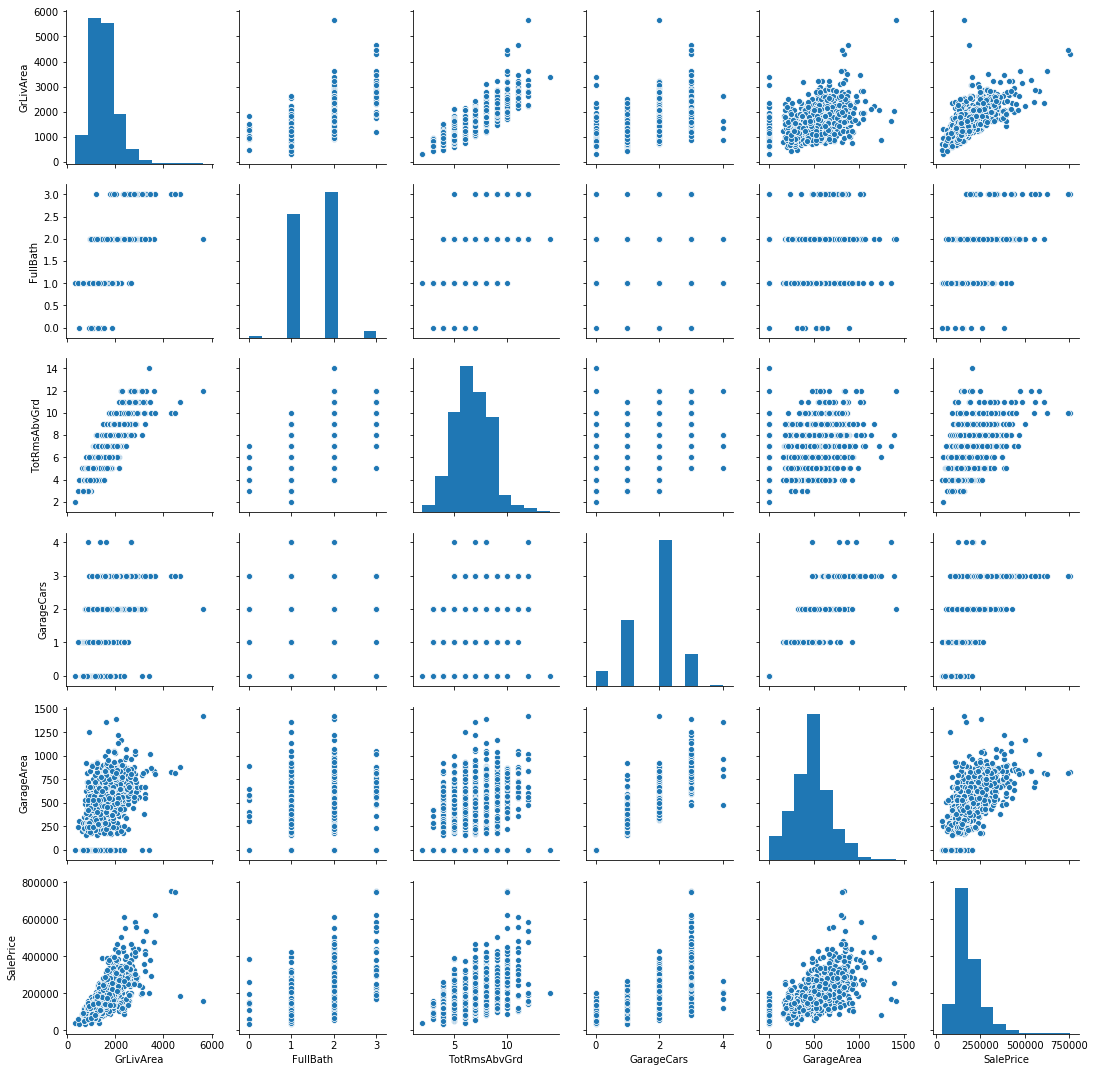

In [194]:
ax = sns.pairplot(data = df[df['is_train']==1], vars=correlated_num_cols[5:])

По графикам видно, что некоторые числовые признаки имеют сильную правую ассиметрию. Трансформируем их значения в логарифм от их значения.

In [195]:
skew_info = df.loc[df['is_train']==1 ,num_cols].skew().sort_values()
skew_info[skew_info>1]

GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
LotFrontage       2.108003
OpenPorchSF       2.364342
MasVnrArea        2.677616
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [207]:
skewed_cols = skew_info[skew_info>1].index.tolist()
skewed_cols.remove(trg)
skewed_cols = [col for col in skewed_cols if df[col].nunique()>10]

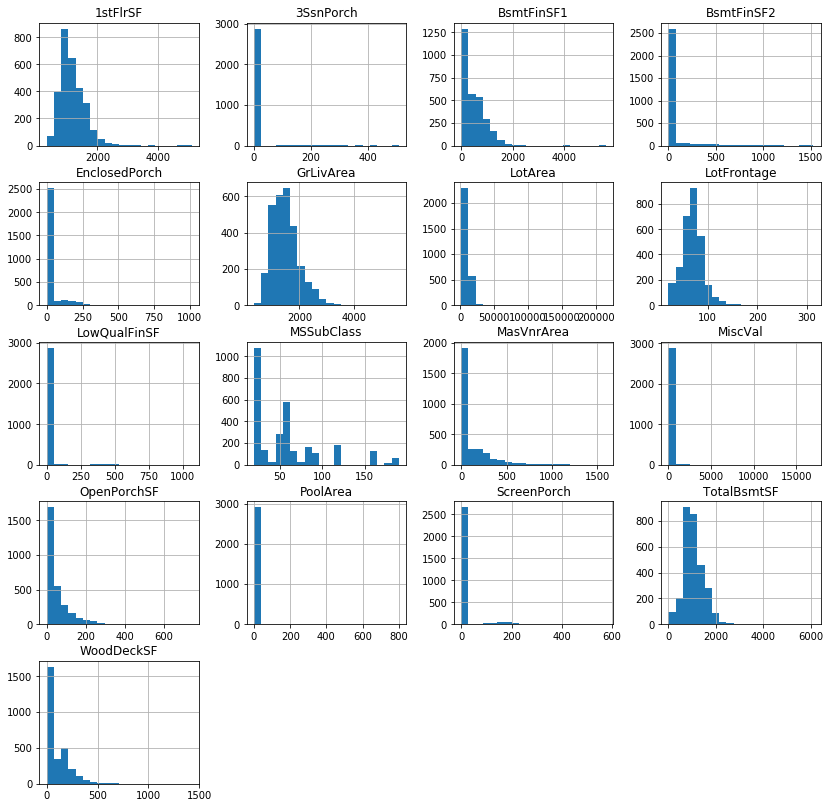

In [208]:
ax = df[skewed_cols].hist(figsize=(14,14), bins=20)

In [209]:
# оставим 3 признака, распределение которых можно с помощью логарифма сделать более-менее 
# похожими на нормальное распределение, что может быть полезным для линейных моделей.
skewed_cols = ['1stFlrSF', 'GrLivArea', 'TotalBsmtSF']

In [210]:
# возьмем логарифм от skewed_cols
for col in skewed_cols:
    df.loc[:, col] = np.log1p(df[col])

In [211]:
df = pd.get_dummies(df, columns=cat_cols)
df.drop([col for col in df.columns if 'to_drop' in col], axis=1, inplace=True)

In [212]:
# разделим dataframe обратно на обучающий и тестовый
X = df[df['is_train']==1].copy()
X_submit = df[df['is_train']==0].copy()

In [213]:
y = X[trg]
y_submit = X_submit[trg]

In [214]:
X.drop(trg, axis=1, inplace=True, errors='ignore')
X_submit.drop(trg, axis=1, inplace=True, errors='ignore')

In [215]:
from sklearn.model_selection import train_test_split

In [433]:
# разделим обучающий набор на обучающий и валидационный.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [929]:
# попробуем обучить 4 модели (2 RandomForestRegressor и 2 LinearRegression).
# с масштабированием целевой переменной и без.
np.random.seed(42)

rfr_1 = RandomForestRegressor(n_estimators=100)
rfr_1.fit(X_train, y_train)
y_pred_rfr_1 = rfr_1.predict(X_val)

rfr_sc = RandomForestRegressor(n_estimators=100)
rfr_sc.fit(X_train, np.log1p(y_train))
y_pred_rfr_sc = np.expm1(rfr_sc.predict(X_val))

lrg_1 = LinearRegression()
lrg_1.fit(X_train, y_train)
y_pred_lrg_1 = lrg_1.predict(X_val)

lrg_sc = LinearRegression()
lrg_sc.fit(X_train, np.log1p(y_train))
y_pred_lrg_sc = np.expm1(lrg_sc.predict(X_val))

In [930]:
mean_squared_log_error(y_val, y_pred_rfr_1)

0.020667915262403014

In [931]:
mean_squared_log_error(y_val, y_pred_rfr_sc)

0.020478397001122913

In [935]:
y.min()

34900

In [937]:
y_pred_lrg_1 = np.where(y_pred_lrg_1>=y.min(), y_pred_lrg_1, y.min())

In [938]:
mean_squared_log_error(y_val, y_pred_lrg_1)

0.04104795180414079

In [933]:
mean_squared_log_error(y_val, y_pred_lrg_sc)

0.01813369548937803

Похоже, масштабирование целевой переменной дает положительный результат.

Посмотрим на важность признаков

In [976]:
features = df.columns[rfr_1.feature_importances_.argsort()[::-1]]
importance = sorted(rfr_1.feature_importances_)[::-1]
feat_imp_df = pd.DataFrame({'features': features, 'importance': importance})
feat_imp_df.head(10)

,features,importance
0,OverallQual,0.540369
1,GrLivArea,0.108613
2,TotalBsmtSF,0.037838
3,GarageCars,0.036644
4,1stFlrSF,0.030907
5,BsmtFinSF1,0.028998
6,LotArea,0.018661
7,GarageArea,0.016602
8,2ndFlrSF,0.014789
9,TotRmsAbvGrd,0.013440


In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as sts
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.model_selection import KFold

In [228]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [301]:
np.random.seed(42)
location = '.\cachedir'
memory = Memory(location)

select_and_predict_pipeline_rfr = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('rfr',  RandomForestRegressor(n_estimators=300))], 
    memory=memory
)

param_distribs_rfr = {
        'pca__n_components': sts.randint(low=50, high=len(X_train.columns)),
        'rfr': [RandomForestRegressor(n_estimators=300)],
        'rfr__max_depth': sts.randint(low=7, high=15),
        'rfr__min_samples_leaf': sts.randint(low=5, high=20),
        'rfr__min_samples_split': sts.randint(low=10, high=20),
        }

random_search_rfr = RandomizedSearchCV(select_and_predict_pipeline_rfr, 
        param_distributions=param_distribs_rfr,
        n_iter=30, cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
random_search_rfr.fit(X_train, np.log1p(y_train))

In [318]:
random_search_rfr.best_score_

-0.00015662645197136215

In [319]:
random_search_rfr.best_params_

{'pca__n_components': 58,
 'rfr': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'rfr__max_depth': 8,
 'rfr__min_samples_leaf': 9,
 'rfr__min_samples_split': 11}

In [305]:
model_rfr = random_search_rfr.best_estimator_

In [306]:
y_pred_rfr = np.expm1(model_rfr.predict(X_val))
mean_squared_log_error(y_val, y_pred_rfr)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.023977402395740234

In [945]:
results_df = pd.DataFrame({'RandomForestRegressor': [mean_squared_log_error(y_val, y_pred_rfr)]})
results_df

,RandomForestRegressor
0,0.023977


In [307]:
from sklearn.ensemble import ExtraTreesRegressor

In [308]:
np.random.seed(42)
try:
    rmtree(location)
except:
    pass

select_and_predict_pipeline_etr = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('etr',  ExtraTreesRegressor(n_estimators=500))], 
    memory=memory
)

param_distribs_etr = {
        'pca__n_components': sts.randint(low=50, high=len(X_train.columns)),
        'etr': [ExtraTreesRegressor(n_estimators=500)],
        'etr__max_depth': sts.randint(low=5, high=25),
        'etr__min_samples_leaf': sts.randint(low=4, high=20),
        'etr__min_samples_split': sts.randint(low=8, high=20),
        }

random_search_etr = RandomizedSearchCV(select_and_predict_pipeline_etr, 
        param_distributions=param_distribs_etr,
        n_iter=50, cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
random_search_etr.fit(X_train, np.log1p(y_train))

In [310]:
random_search_etr.best_score_

-0.00014923121226744128

In [311]:
random_search_etr.best_params_

{'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
 'etr__max_depth': 17,
 'etr__min_samples_leaf': 6,
 'etr__min_samples_split': 14,
 'pca__n_components': 101}

In [312]:
model_etr = random_search_etr.best_estimator_

In [313]:
y_pred_etr = np.expm1(model_etr.predict(X_val))
mean_squared_log_error(y_val, y_pred_etr)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.022909784764017265

In [948]:
results_df['ExtraTreesRegressor'] = mean_squared_log_error(y_val, y_pred_etr)

In [314]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [315]:
np.random.seed(42)
try:
    rmtree(location)
except:
    pass

select_and_predict_pipeline_svr = Pipeline([
    ('feature_selection', RFE(RandomForestRegressor(n_estimators=20), 
                            n_features_to_select=int(0.9*X_train.shape[1]), step=5)),
    ('std_scaler', StandardScaler()),
    ('svr',  SVR())], 
    memory=memory
)

param_grid_svr = {
    'svr': [SVR()],
    'svr__kernel': ['poly'],
    'svr__C': [5, 8, 10, 12, 15],
    'svr__gamma': [0.5, 0.15, 0.1, 0.05],
    }

grid_search_svr = GridSearchCV(select_and_predict_pipeline_svr, param_grid=param_grid_svr, 
                            cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
grid_search_svr.fit(X_train, np.log1p(y_train))

In [320]:
grid_search_svr.best_score_

-0.0002155981287104018

In [321]:
grid_search_svr.best_params_

{'svr': SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
   kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'svr__C': 5,
 'svr__gamma': 0.5,
 'svr__kernel': 'poly'}

In [322]:
model_svr = grid_search_svr.best_estimator_

In [323]:
y_pred_svr = np.expm1(model_svr.predict(X_val))
mean_squared_log_error(y_val, y_pred_svr)

0.026258474269656714

In [952]:
results_df['SVR'] = mean_squared_log_error(y_val, y_pred_svr)

In [324]:
from sklearn.neighbors import KNeighborsRegressor

In [325]:
np.random.seed(42)
try:
    rmtree(location)
except:
    pass

select_and_predict_pipeline_knn = Pipeline([
    ('feature_selection', RFE(RandomForestRegressor(n_estimators=20), 
                            n_features_to_select=int(0.9*X_train.shape[1]), step=5)),
    ('std_scaler', StandardScaler()),
    ('knn',  KNeighborsRegressor())], 
    memory=memory
)

param_grid_knn = {
        'knn': [KNeighborsRegressor()],
        'knn__weights': ['uniform', 'distance'],
        'knn__n_neighbors': list(range(3, 12)),
        'knn__p': [1, 2]
        }

grid_search_knn = GridSearchCV(select_and_predict_pipeline_knn, 
        param_grid=param_grid_knn, cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
grid_search_knn.fit(X_train, np.log1p(y_train))

In [327]:
grid_search_knn.best_score_

-0.00020782485450180767

In [328]:
grid_search_knn.best_params_

{'knn': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='distance'),
 'knn__n_neighbors': 4,
 'knn__p': 1,
 'knn__weights': 'distance'}

In [329]:
model_knn = grid_search_knn.best_estimator_

In [337]:
y_pred_knn = np.expm1(model_knn.predict(X_val))

In [344]:
mean_squared_log_error(y_val, y_pred_knn)

0.031793001639075606

In [953]:
results_df['KNRegressor'] = mean_squared_log_error(y_val, y_pred_knn)

In [345]:
from sklearn.linear_model import ElasticNet

In [346]:
np.random.seed(42)
try:
    rmtree(location)
except:
    pass

select_and_predict_pipeline_en = Pipeline([
    ('std_scaler', StandardScaler()),
    ('en',  ElasticNet())], 
    memory=memory
)

param_grid_en = {
    'en': [ElasticNet()],
    'en__alpha': np.arange(5e-4, 1.5e-3, 1e-4),
    'en__l1_ratio': np.arange(0.5,1.2,0.1),
    'en__max_iter': [5000],
    }


grid_search_en = GridSearchCV(select_and_predict_pipeline_en, param_grid=param_grid_en, 
                            cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
grid_search_en.fit(X_train, np.log1p(y_train))

In [350]:
grid_search_en.best_score_

-9.733848081753196e-05

In [351]:
grid_search_en.best_params_

{'en': ElasticNet(alpha=0.0014000000000000004, copy_X=True, fit_intercept=True,
       l1_ratio=1.0999999999999999, max_iter=5000, normalize=False,
       positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'en__alpha': 0.0014000000000000004,
 'en__l1_ratio': 1.0999999999999999,
 'en__max_iter': 5000}

In [352]:
model_en = grid_search_en.best_estimator_

In [353]:
y_pred_en = np.expm1(model_en.predict(X_val))
mean_squared_log_error(y_val, y_pred_en)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.015371700176589946

In [954]:
results_df['ElasticNet'] = mean_squared_log_error(y_val, y_pred_en)

In [354]:
from xgboost import XGBRegressor

In [356]:
np.random.seed(42)
try:
    rmtree(location)
except:
    pass

select_and_predict_pipeline_xgb = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb',  XGBRegressor())], 
    memory
)

param_distribs_xgb = {
        'pca__n_components': sts.randint(low=50, high=len(X_train.columns)),
        'xgb':  [XGBRegressor()],
        'xgb__n_estimators': sts.randint(low=100, high=500),
        'xgb__gamma': np.arange(0.1, 2, 0.1),
        'xgb__max_depth': sts.randint(low=2, high=7)
        }


random_search_xgb = RandomizedSearchCV(select_and_predict_pipeline_xgb, param_distributions=param_distribs_xgb,
        n_iter=80, cv=kf, n_jobs=-1, scoring='neg_mean_squared_log_error', verbose=10)

In [ ]:
random_search_xgb.fit(X_train, np.log1p(y_train))

In [358]:
random_search_xgb.best_score_

-0.00013286195967371982

In [359]:
random_search_xgb.best_params_

{'pca__n_components': 193,
 'xgb': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
        max_depth=2, min_child_weight=1, missing=None, n_estimators=223,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 'xgb__gamma': 0.1,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 223}

In [360]:
model_xgb = random_search_xgb.best_estimator_

In [361]:
y_pred_xgb = np.expm1(model_xgb.predict(X_val))
mean_squared_log_error(y_val, y_pred_xgb)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.02118231276120233

In [955]:
results_df['XGBRegressor'] = mean_squared_log_error(y_val, y_pred_xgb)

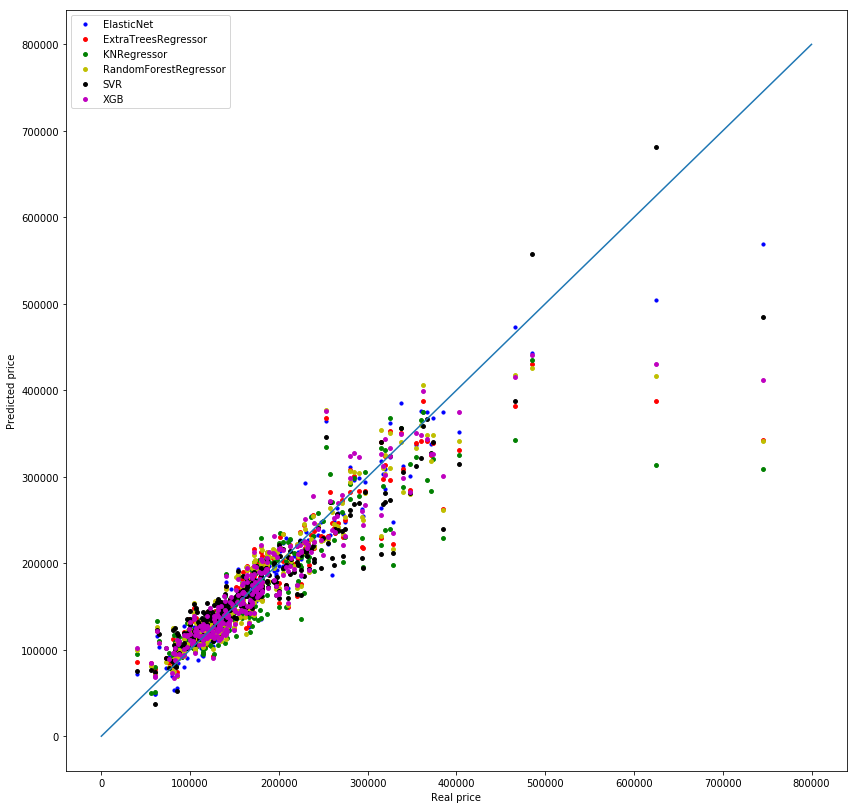

In [965]:
fig = plt.figure(figsize=(14,14))
ax = plt.scatter(y_val, y_pred_en, s=10, c='b', label='ElasticNet')
ax2 = plt.scatter(y_val, y_pred_etr, s=15, c='r', label='ExtraTreesRegressor')
ax3 = plt.scatter(y_val, y_pred_knn, s=15, c='g', label='KNRegressor')
ax4 = plt.scatter(y_val, y_pred_rfr, s=15, c='y', label='RandomForestRegressor')
ax5 = plt.scatter(y_val, y_pred_svr, s=15, c='k', label='SVR')
ax6 = plt.scatter(y_val, y_pred_xgb, s=15, c='m', label='XGB')
ax7 = plt.plot([0, 800000], [0, 800000])
leg = plt.legend(loc='upper left')
lab1 = plt.xlabel('Real price')
lab2 = plt.ylabel('Predicted price')

Как видно из графика модели сильно ошибаются на образцах с высокой стоимостью. И чем меньше образцов для обучения в данном диапазоне цен, тем сильнее ошибаются модели.

In [901]:
# создадим ансамбль из ранее подобранных моделей, а также добавим те же модели, но с базовыми гиперпараметрами.
regressors = [model_rfr, model_etr, model_svr, model_en, model_knn, KNeighborsRegressor(),
              model_xgb, XGBRegressor(), Lasso(), RandomForestRegressor()]

In [902]:
def get_X_train_meta(regressors, X_train, y_train):
    '''
    Функция возвращает матрицу предсказаний ансамбля regressors
    на обучающем наборе данных, где каждый столбец это вектор 
    предсказаний модели из ансамбля. Данная матрица будет 
    использоваться для обучения мета модели.
    '''
    np.random.seed(42)
    X_train_meta = np.empty((y_train.shape[0], len(regressors)))
    for train_idx, test_idx in kf.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train.iloc[train_idx,:], X_train.iloc[test_idx,:]
        y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]
        for i, rgr in enumerate(regressors):
            rgr.fit(X_train_cv, np.log1p(y_train_cv))
            y_test_pr = np.expm1(rgr.predict(X_test_cv))
            X_train_meta[test_idx, i] = y_test_pr
    return X_train_meta

In [ ]:
X_train_meta = get_X_train_meta(regressors, X_train, y_train)

In [904]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor

In [905]:
# мета модель, представляющая собой бэггинг ансамбль с базовой моделью - Ridge.
meta_rgr = BaggingRegressor(base_estimator=Ridge(), n_estimators=30, random_state=42)

In [907]:
def get_X_meta_val(regressors, X_train, X_val, y_train):
    '''
    Функция возвращает матрицу предсказаний ансамбля regressors
    на тестовом наборе данных, где каждый столбец это вектор 
    предсказаний модели из ансамбля. Данная матрица будет 
    использоваться для предсказаний мета модели.
    '''
    np.random.seed(42)
    X_meta_val = np.empty((X_val.shape[0], len(regressors)))
    for i, rgr in enumerate(regressors):
        rgr.fit(X_train, np.log1p(y_train))
        y_val_pr = np.expm1(rgr.predict(X_val))
        X_meta_val[:, i] = y_val_pr
    return X_meta_val

In [ ]:
X_meta_val = get_X_meta_val(regressors, X_train, X_val, y_train)

In [909]:
meta_rgr.fit(X_train_meta, y_train)

BaggingRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [910]:
# предсказания мета модели на тестовом наборе данных
y_pred_meta_val = meta_rgr.predict(X_meta_val)

In [956]:
pd.DataFrame({'pred': y_pred_meta_val, 'real': y_val}).head()

,pred,real
Id,,
259,211631.564040,231500
268,175736.966946,179500
289,110123.600189,122000
650,73228.664793,84500
1234,132056.271346,142000


In [912]:
mean_squared_log_error(y_pred_meta_val, y_val)

0.014673907925761304

In [957]:
results_df['Ensemble'] = mean_squared_log_error(y_pred_meta_val, y_val)

In [961]:
results_df['index'] = 'mean_squared_log_error'
results_df.set_index('index')

,RandomForestRegressor,ExtraTreesRegressor,SVR,KNRegressor,ElasticNet,XGBRegressor,Ensemble
index,,,,,,,
mean_squared_log_error,0.023977,0.02291,0.026258,0.031793,0.015372,0.021182,0.014674


Как и следовало ожидать производительность ансамбля выше производительности любой из моделей, входящих в ансамбль.
Так же стоит отметит, что очень хорошие результаты показала линейная модель ElasticNet, лишь не намного уступив ансамблю.

Теперь проделаем все тоже самое но на всем обучающем наборе.

In [ ]:
X_meta = get_X_train_meta(regressors, X, y)

In [914]:
meta_rgr.fit(X_meta, y)

BaggingRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [ ]:
X_meta_submit = get_X_meta_val(regressors, X, X_submit, y)

In [916]:
y_submit = meta_rgr.predict(X_meta_submit)

In [917]:
y_submit

array([122170.39030958, 162358.07916639, 185395.39772729, ...,
       172033.79734292, 116031.25076313, 225256.5802651 ])

In [918]:
df_submit = pd.read_csv('sample_submission.csv')

In [920]:
df_submit['SalePrice'] = y_submit

In [921]:
df_submit.set_index('Id', inplace=True)

In [922]:
df_submit.to_csv('submission.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc9e2e8748>]],
      dtype=object)

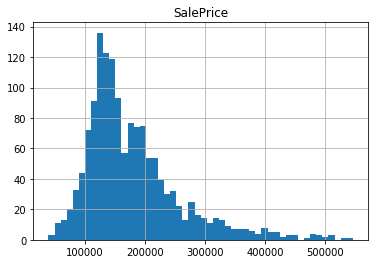

In [923]:
df_submit.hist(bins=50)

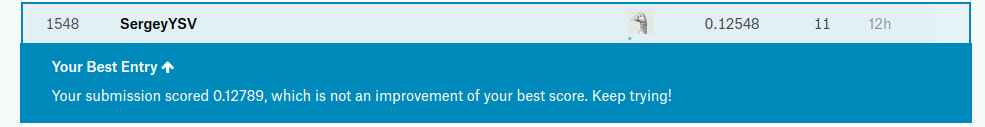

In [978]:
from IPython.display import Image
Image(filename='Screenshot_kaggle.png')